1회: theta0 = 9.358, theta1 = 2.393, 차이 = 76083.4693
2회: theta0 = 17.754, theta1 = 4.215, 차이 = 73070.5639
3회: theta0 = 25.982, theta1 = 6.000, 차이 = 70176.9696
4회: theta0 = 34.045, theta1 = 7.750, 차이 = 67397.9616
5회: theta0 = 41.948, theta1 = 9.464, 차이 = 64729.0023
6회: theta0 = 49.692, theta1 = 11.145, 차이 = 62165.7338
7회: theta0 = 57.281, theta1 = 12.791, 차이 = 59703.9708
8회: theta0 = 64.718, theta1 = 14.405, 차이 = 57339.6935
9회: theta0 = 72.007, theta1 = 15.986, 차이 = 55069.0417
10회: theta0 = 79.150, theta1 = 17.536, 차이 = 52888.3076
11회: theta0 = 86.150, theta1 = 19.055, 차이 = 50793.9306
12회: theta0 = 93.010, theta1 = 20.544, 차이 = 48782.4910
13회: theta0 = 99.732, theta1 = 22.002, 차이 = 46850.7043
14회: theta0 = 106.321, theta1 = 23.432, 차이 = 44995.4165
15회: theta0 = 112.777, theta1 = 24.833, 차이 = 43213.5980
16회: theta0 = 119.105, theta1 = 26.206, 차이 = 41502.3395
17회: theta0 = 125.306, theta1 = 27.551, 차이 = 39858.8468
18회: theta0 = 131.383, theta1 = 28.870, 차이 = 38280.4365
19회: theta0 = 137.33

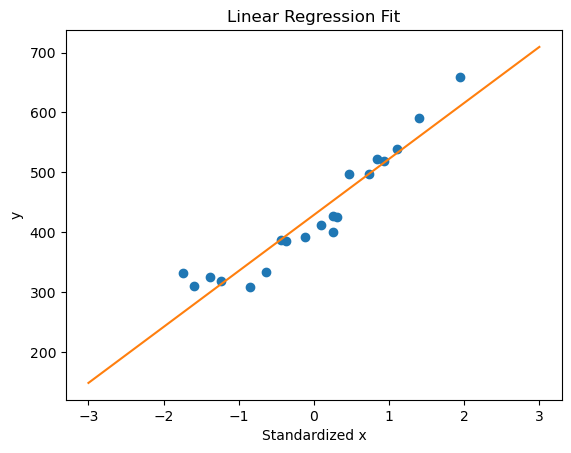

f(standardize(100)) = [370.96735005]
f(standardize(200)) = [510.46991542]
f(standardize(300)) = [649.97248079]


In [7]:
"""
최적화 내용
1.데이터 로드 에러 처리: 데이터를 로드할 때 발생할 수 있는 에러를 처리합니다.
2.학습 반복 에러 처리: 학습 과정에서 발생할 수 있는 오버플로우 및 기타 예외를 처리합니다.
3.시각화 에러 처리: 시각화 과정에서 발생할 수 있는 에러를 처리합니다.
4.검증 에러 처리: 예측 값을 계산할 때 발생할 수 있는 에러를 처리합니다.
"""
import numpy as np
import matplotlib.pyplot as plt

# 데이터 파일 경로 설정
file_path = 'click.csv'

try:
    # 학습 데이터 로드
    train = np.loadtxt(file_path, delimiter=',', dtype='int', skiprows=1)
    train_x = train[:, 0]
    train_y = train[:, 1]
except Exception as e:
    print(f"Error loading data from {file_path}: {e}")
    exit(1)

# 파라미터 초기화
theta0 = np.random.rand()
theta1 = np.random.rand()

# 예측 함수 정의
def f(x):
    return theta0 + theta1 * x

# 목적 함수 정의 (오차 계산)
def E(x, y):
    return 0.5 * np.sum((y - f(x)) ** 2)

# 표준화 함수 정의
mu = train_x.mean()
sigma = train_x.std()

def standardize(x):
    return (x - mu) / sigma

train_z = standardize(train_x)

# 학습률 및 초기 설정
ETA = 1e-3
diff = 1
count = 0
error = E(train_z, train_y)

# 학습 반복 (에러가 0.01 이하가 될 때까지)
while diff > 1e-2:
    try:
        # 파라미터 업데이트
        tmp_theta0 = theta0 - ETA * np.sum((f(train_z) - train_y))
        tmp_theta1 = theta1 - ETA * np.sum((f(train_z) - train_y) * train_z)

        # 파라미터 값 업데이트
        theta0, theta1 = tmp_theta0, tmp_theta1

        # 새로운 에러 계산
        current_error = E(train_z, train_y)
        diff = error - current_error
        error = current_error

        # 학습 로그 출력
        count += 1
        log = '{}회: theta0 = {:.3f}, theta1 = {:.3f}, 차이 = {:.4f}'
        print(log.format(count, theta0, theta1, diff))
    except OverflowError as e:
        print(f"Overflow error: {e}")
        break
    except Exception as e:
        print(f"An error occurred: {e}")
        break

# 학습 결과 시각화
try:
    x = np.linspace(-3, 3, 100)
    plt.plot(train_z, train_y, 'o')
    plt.plot(x, f(x))
    plt.xlabel('Standardized x')
    plt.ylabel('y')
    plt.title('Linear Regression Fit')
    plt.show()
except Exception as e:
    print(f"Error during plotting: {e}")

# 검증 예제
try:
    for val in [100, 200, 300]:
        standardized_val = standardize(np.array([val]))
        prediction = f(standardized_val)
        print(f"f(standardize({val})) = {prediction}")
except Exception as e:
    print(f"Error during validation: {e}")